This notebook is for Traffic sign Classification created by Nishant Welpulwar

In [17]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [18]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import pickle
import pandas as pd
import cv2

In [0]:
np.random.seed(0)

In [21]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
  
with open('german-traffic-signs/valid.p', 'rb') as f:
  validation_data = pickle.load(f)
  
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

  
print(type(train_data))

x_train, y_train = train_data['features'], train_data['labels']
x_val, y_val = validation_data['features'], validation_data['labels']
x_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [22]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


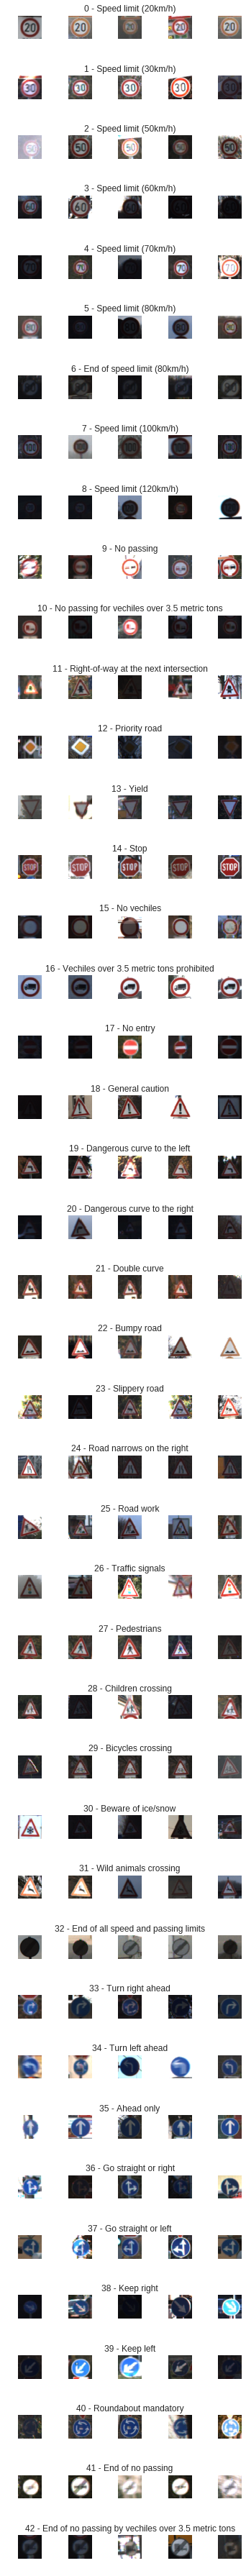

In [23]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = x_train[y_train == j]
      axs[j][i].imshow(x_selected[np.random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


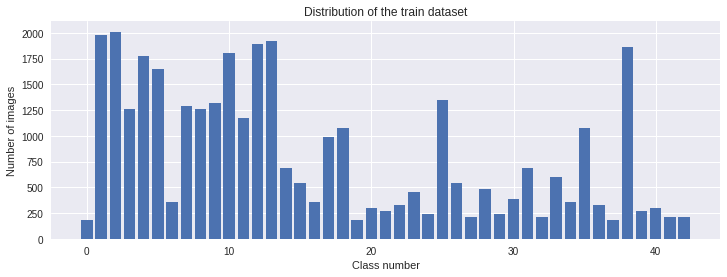

In [24]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(-0.5, 31.5, 31.5, -0.5)

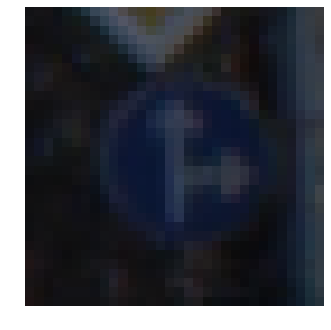

In [25]:

plt.imshow(x_train[1000])
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

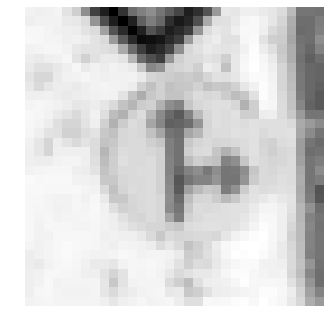

In [28]:
gray = cv2.cvtColor(x_train[1000], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

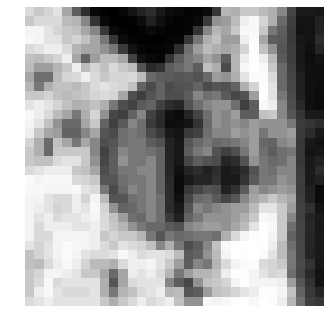

In [29]:
hist=cv2.equalizeHist(gray)
plt.imshow(hist)
plt.axis('off')

In [0]:
img=hist/255

In [0]:
def preprocessing(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hist = cv2.equalizeHist(gray)
  img = hist/255
  return img

In [0]:
x_train = np.array(list(map(preprocessing, x_train)))
x_val = np.array(list(map(preprocessing, x_val)))
x_test = np.array(list(map(preprocessing, x_test)))

(34799, 32, 32)


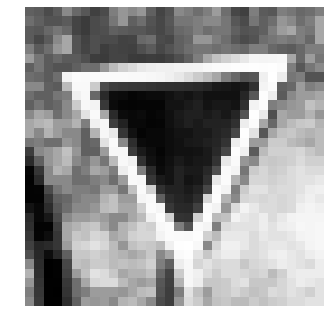

In [33]:
plt.imshow(x_train[np.random.randint(0, len(x_train) - 1)])
plt.axis('off')
print(x_train.shape)

In [0]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  zoom_range = 0.2,
                                  shear_range = 0.1)

datagen.fit(x_train)



In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
  model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(30, (3, 3), activation = 'relu'))
  model.add(Conv2D(30, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))

  model.add(Dense(43, activation = 'softmax'))
  
  model.compile(Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [51]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 480)               0         
__________

In [52]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10, validation_data=(x_val, y_val), shuffle = 1)


Epoch 1/10
1088/1087 [==============================] - 23s 21ms/step - loss: 1.1157 - acc: 0.6776 - val_loss: 0.1990 - val_acc: 0.9383
Epoch 2/10
1088/1087 [==============================] - 23s 21ms/step - loss: 0.2557 - acc: 0.9209 - val_loss: 0.1095 - val_acc: 0.9658
Epoch 3/10
1088/1087 [==============================] - 23s 21ms/step - loss: 0.1588 - acc: 0.9503 - val_loss: 0.1402 - val_acc: 0.9542
Epoch 4/10
1088/1087 [==============================] - 23s 21ms/step - loss: 0.1292 - acc: 0.9609 - val_loss: 0.1257 - val_acc: 0.9594
Epoch 5/10
1088/1087 [==============================] - 23s 21ms/step - loss: 0.0992 - acc: 0.9692 - val_loss: 0.0433 - val_acc: 0.9873
Epoch 6/10
1088/1087 [==============================] - 23s 21ms/step - loss: 0.0909 - acc: 0.9723 - val_loss: 0.0770 - val_acc: 0.9805
Epoch 7/10
1088/1087 [==============================] - 23s 21ms/step - loss: 0.0812 - acc: 0.9753 - val_loss: 0.1010 - val_acc: 0.9735
Epoch 8/10
1088/1087 [==========================

Text(0.5,1,'Accuracy')

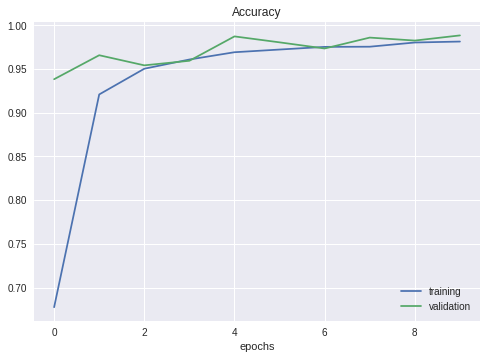

In [53]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.xlabel('epochs')
plt.title('Accuracy')

Text(0.5,1,'Loss')

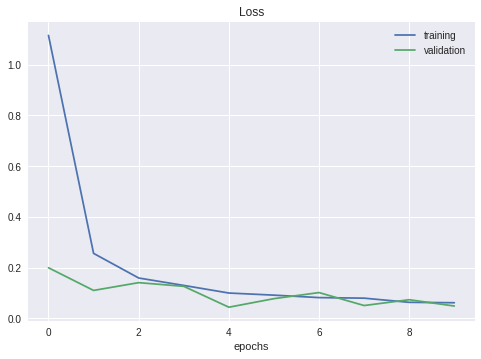

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.xlabel('epochs')
plt.title('Loss')

In [55]:
score = model.evaluate(x_test, y_test)
print('Test Score:', score[0])
print('Test Accuracy', score[1])

12630/12630 [==============================] - 2s 153us/step
Test Score: 0.16093056471491127
Test Accuracy 0.9657165478923825


(32, 32)
predicted sign: [34]


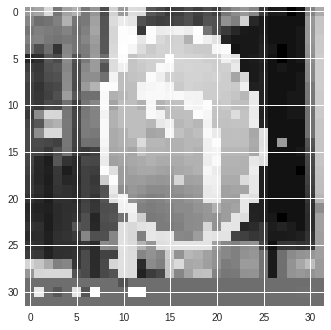

In [57]:
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
 
print("predicted sign: "+ str(model.predict_classes(img)))